In [1]:
# import libraries
from dataloader import get_dataloader_vae
from dataloader import get_dataloader_OOD
from models import get_trained_model
from energy import ELOOD
import matplotlib.pyplot as plt

# Get model, dataloaders, and OOD detectors

In [2]:
# get model
model = get_trained_model('CIFAR10')

# get dataloaders
train_dl_c10, _ = get_dataloader_vae('CIFAR10')
train_dl_c100, _ = get_dataloader_vae('CIFAR100')
svhn_dl = get_dataloader_OOD('SVHN')
lsun_dl = get_dataloader_OOD('LSUN')

# get OOD detector
c10_ood = ELOOD(model)
c100_ood = ELOOD(model)

Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: data\test_32x32.mat


# Train OOD detector for CIFAR 10

In [3]:
c10_ood.train_ood(train_dl_c10)

# Get predictions for SVHN and LSUN

In [4]:
svhn_c10_ood = c10_ood.predict_ood(svhn_dl)
lsun_c10_ood = c10_ood.predict_ood(lsun_dl)

# Plotting Energy Score Ranges for Cifar 10

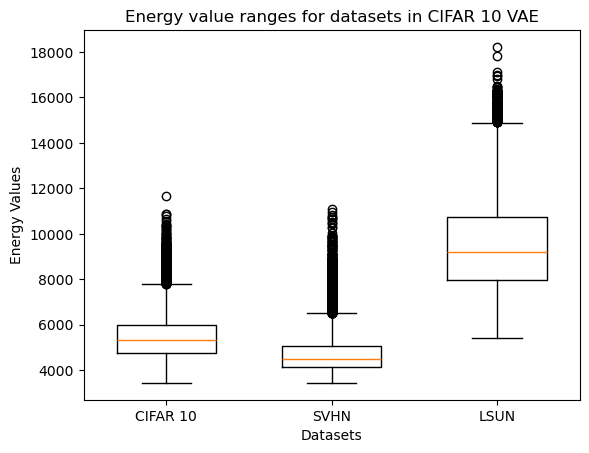

In [5]:
c1 = c10_ood.train_scores
c2 = c10_ood.get_scores(svhn_dl)
c3 = c10_ood.get_scores(lsun_dl)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the boxplots
box1 = ax.boxplot(c1, positions=[1], widths=0.6)
box2 = ax.boxplot(c2, positions=[2], widths=0.6)
box3 = ax.boxplot(c3, positions=[3], widths=0.6)

# Set the x-axis tick labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['CIFAR 10', 'SVHN', 'LSUN'])

# Add labels and title
ax.set_xlabel('Datasets')
ax.set_ylabel('Energy Values')
ax.set_title('Energy value ranges for datasets in CIFAR 10 VAE')

# Show the plot
plt.show()

# Train OOD detector for CIFAR 100

In [6]:
c100_ood.train_ood(train_dl_c100)

# Get predictions for SVHN and LSUN

In [7]:
svhn_c100_ood = c100_ood.predict_ood(svhn_dl)
lsun_c100_ood = c100_ood.predict_ood(lsun_dl)

# Plotting Energy Score Ranges for Cifar 100

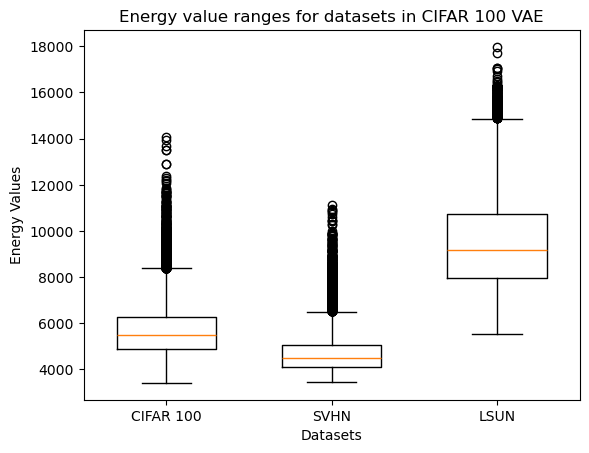

In [8]:
c1 = c100_ood.train_scores
c2 = c100_ood.get_scores(svhn_dl)
c3 = c100_ood.get_scores(lsun_dl)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the boxplots
box1 = ax.boxplot(c1, positions=[1], widths=0.6)
box2 = ax.boxplot(c2, positions=[2], widths=0.6)
box3 = ax.boxplot(c3, positions=[3], widths=0.6)

# Set the x-axis tick labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['CIFAR 100', 'SVHN', 'LSUN'])

# Add labels and title
ax.set_xlabel('Datasets')
ax.set_ylabel('Energy Values')
ax.set_title('Energy value ranges for datasets in CIFAR 100 VAE')

# Show the plot
plt.show()

# Get metrics for all predictions

For VAE trained on CIFAR 10 =>
For SVHN =>


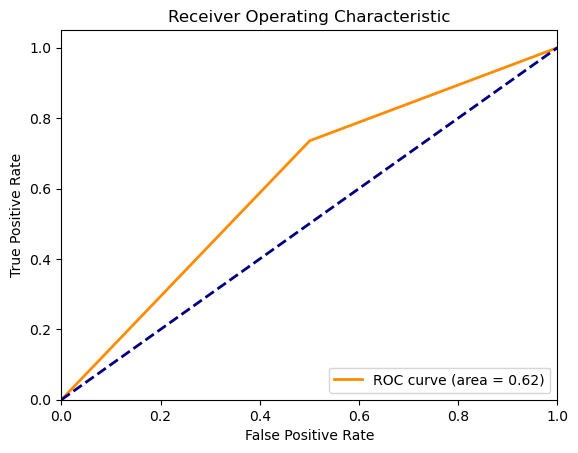

FPR@TPR95 =  1.0  AUPR =  0.731454785905928  AUROC =  0.6175092194222496
For LSUN =>


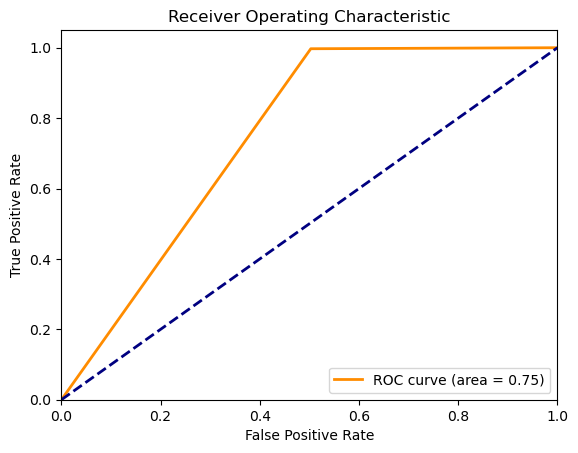

FPR@TPR95 =  0.5028  AUPR =  0.8316638259217282  AUROC =  0.74715

For VAE trained on CIFAR 100 =>
For SVHN =>


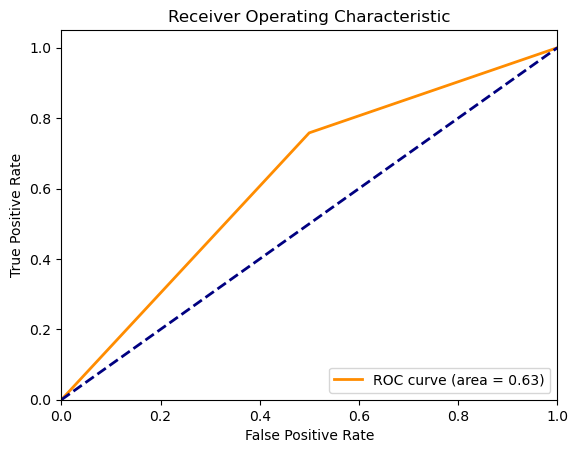

FPR@TPR95 =  1.0  AUPR =  0.7409225539997816  AUROC =  0.6292639827904117
For LSUN =>


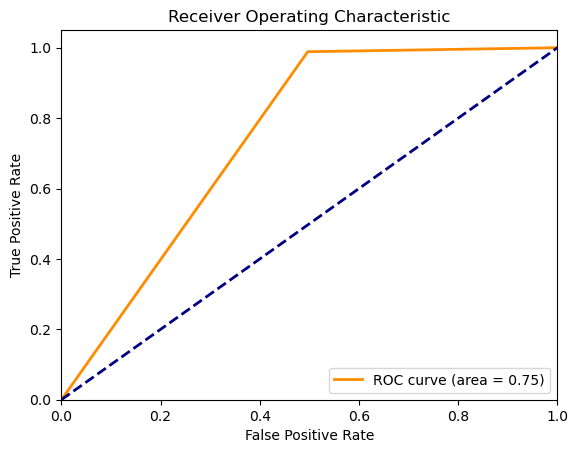

FPR@TPR95 =  0.4967  AUPR =  0.8299809781876936  AUROC =  0.7460000000000001


In [9]:
print("For VAE trained on CIFAR 10 =>")
print("For SVHN =>")
false_positive_rate_95, aupr, auroc = c10_ood.get_metrics(svhn_c10_ood)
print("FPR@TPR95 = ", false_positive_rate_95," AUPR = ", aupr," AUROC = ", auroc)
print("For LSUN =>")
false_positive_rate_95, aupr, auroc = c10_ood.get_metrics(lsun_c10_ood)
print("FPR@TPR95 = ", false_positive_rate_95," AUPR = ", aupr," AUROC = ", auroc)
print()
print("For VAE trained on CIFAR 100 =>")
print("For SVHN =>")
false_positive_rate_95, aupr, auroc = c100_ood.get_metrics(svhn_c100_ood)
print("FPR@TPR95 = ", false_positive_rate_95," AUPR = ", aupr," AUROC = ", auroc)
print("For LSUN =>")
false_positive_rate_95, aupr, auroc = c100_ood.get_metrics(lsun_c100_ood)
print("FPR@TPR95 = ", false_positive_rate_95," AUPR = ", aupr," AUROC = ", auroc)